# <center>**Obesity Prediction Analysis**</center>

## **Business Understanding**

### Introduction

Obesity is a significant global health concern, and its rising rates are particularly notable in countries such as Mexico, Peru, and Colombia. This dataset includes information about individuals from these countries, focusing on their eating habits, physical activity, and other lifestyle factors to predict obesity levels. By leveraging this data, we can help public health initiatives target the root causes of obesity and develop personalized interventions to combat this issue. 

### Problem Statement

The goal of this project is to explore and predict obesity levels based on demographic and lifestyle attributes. Specifically, we aim to answer the following key questions:

- **What factors contribute to obesity?**  
  The dataset contains information on eating habits, physical activity, and lifestyle choices that can help us identify the key factors leading to obesity in this population.
  
- **Can we predict obesity levels based on demographic and lifestyle attributes?**  
  The target variable, `Obesity_level`, allows us to classify individuals into different obesity categories. Our goal is to build a machine learning model capable of accurately predicting these categories.

- **How can these predictions help in public health planning and personalized interventions?**  
  By predicting obesity levels, we can provide valuable information that helps health professionals and policymakers design more effective public health strategies and personalized intervention programs.

### Objectives

#### Main Objective
The primary objective of this project is to develop a predictive model that can accurately classify obesity levels in individuals based on their demographic and lifestyle attributes.

#### Specific Objectives
1. **Data Exploration and Preprocessing**: Explore the dataset, handle missing values, remove outliers, and transform features as necessary for modeling.
2. **Feature Analysis and Selection**: Identify and analyze key features contributing to obesity using exploratory data analysis (EDA).
3. **Model Building and Evaluation**: Build and evaluate multiple machine learning models (e.g., logistic regression, random forests, SVM) to predict obesity levels.
4. **Model Optimization**: Optimize the model for maximum accuracy and generalization.
5. **Actionable Insights**: Provide valuable insights that can be used by health professionals and policymakers for obesity prevention strategies.

### Metric of Success

The success of this project will be measured using the following metrics:
1. **Accuracy**: The percentage of correctly predicted obesity levels compared to the actual labels.
2. **Precision, Recall, and F1-Score**: These metrics are crucial due to the multi-class nature of the problem, ensuring a balanced performance across all obesity categories.
3. **AUC-ROC Curve**: Used to evaluate the performance of classification models, especially when dealing with imbalanced classes.
4. **Model Interpretability**: The ability to interpret the model's predictions and provide actionable insights to stakeholders.








## **Data Understanding**
About Dataset

Overview:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Data Details:

- Gender: Gender

- Age: Age

- Height : in metres

- Weight : in kgs

- family_history : Has a family member suffered or suffers from overweight?

- FAVC : Do you eat high caloric food frequently?

- FCVC : Do you usually eat vegetables in your meals?

- NCP : How many main meals do you have daily?

- CAEC : Do you eat any food between meals?

- SMOKE : Do you smoke?

- CH2O : How much water do you drink daily?

- SCC : Do you monitor the calories you eat daily?

- FAF: How often do you have physical activity?

- TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

- CALC : How often do you drink alcohol?

- MTRANS : Which transportation do you usually use?

- Obesity_level (Target Column) : Obesity level

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats


In [4]:
# Load the dataset into a DataFrame
df = pd.read_csv('Obesity prediction.csv', index_col=None)


In [5]:
# Inspect the first few rows of the dataset
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Inspect the columns and rows
df.shape

(2111, 17)

In [7]:
# inspect dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [8]:
# inspect dataset stats
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
# check if the dataset have any missing values
df.isna().any()

Gender            False
Age               False
Height            False
Weight            False
family_history    False
FAVC              False
FCVC              False
NCP               False
CAEC              False
SMOKE             False
CH2O              False
SCC               False
FAF               False
TUE               False
CALC              False
MTRANS            False
Obesity           False
dtype: bool

In [10]:
# Inspect for any duplicates
df.duplicated().any()
duplicate_count = df.duplicated().sum()
duplicate_count

24

In [11]:
if duplicate_count > 0:
    duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all occurrences of duplicates
    print("Duplicate rows found:")
    print(duplicate_rows)


Duplicate rows found:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
97   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
105  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
145    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
208  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
282  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
295  Female  16.0 

In [12]:
# View the duplicate rows, if any
if duplicate_count > 0:
    duplicate_rows = df[df.duplicated()]
    print("Duplicate rows:")
    print(duplicate_rows)

Duplicate rows:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0   Sometimes   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
467    Male  22.0    1.74    75.0            yes  yes   3.0  3.0  Frequently   
496    Male  18.0    1.72    53.0            yes  yes   2.0  3.0   Sometimes   
527  Female  21.0    1.52    42.0             no  yes   3.0  1.0  Frequently   
659  Female  21.0    1.5

In [13]:
# Drop duplicates
df = df.drop_duplicates()

# Confirm no duplicates remain
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


In [14]:
df['Gender'].value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [15]:
df['CALC'].value_counts()

CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

In [16]:
df['SMOKE'].value_counts()

SMOKE
no     2043
yes      44
Name: count, dtype: int64

In [17]:
df['family_history'].value_counts()

family_history
yes    1722
no      365
Name: count, dtype: int64

In [18]:
df['CH2O'].value_counts()

CH2O
2.000000    445
1.000000    204
3.000000    148
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64

In [19]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [20]:
df['FAF'].value_counts()

FAF
0.000000    405
1.000000    217
2.000000    182
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: count, Length: 1190, dtype: int64

In [21]:
df['TUE'].value_counts()

TUE
0.000000    537
1.000000    289
2.000000    108
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: count, Length: 1129, dtype: int64

In [22]:
df['NCP'].value_counts()

NCP
3.000000    1199
1.000000     179
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64

In [23]:
df['CAEC'].value_counts()

CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

In [24]:
df['Age'].value_counts()

Age
18.000000    126
26.000000    101
23.000000     89
21.000000     78
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

In [25]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

## **Exploratory Data Analysis**

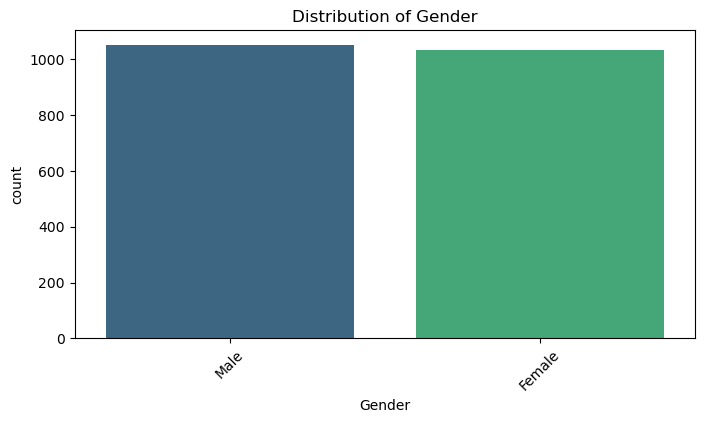

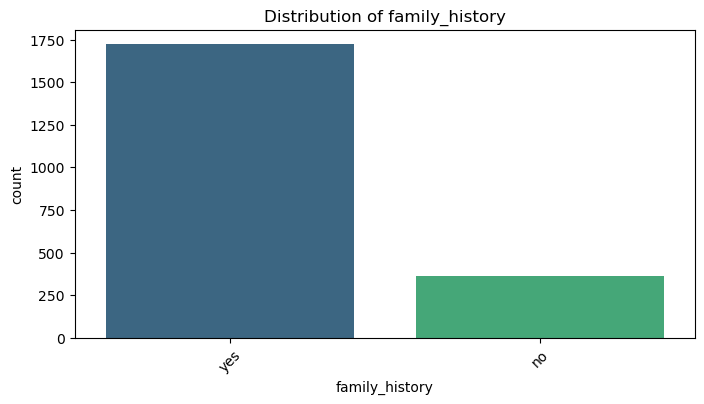

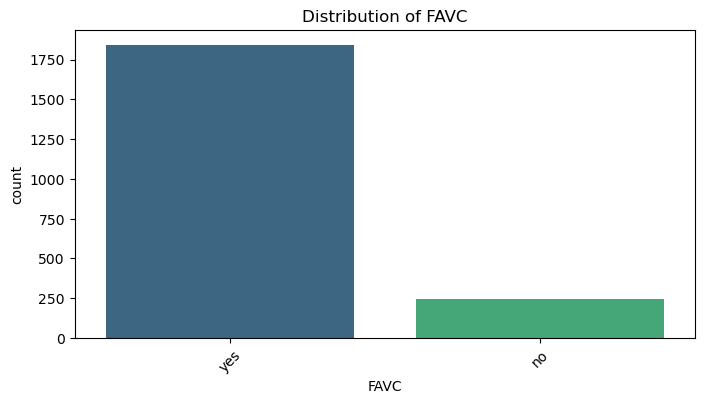

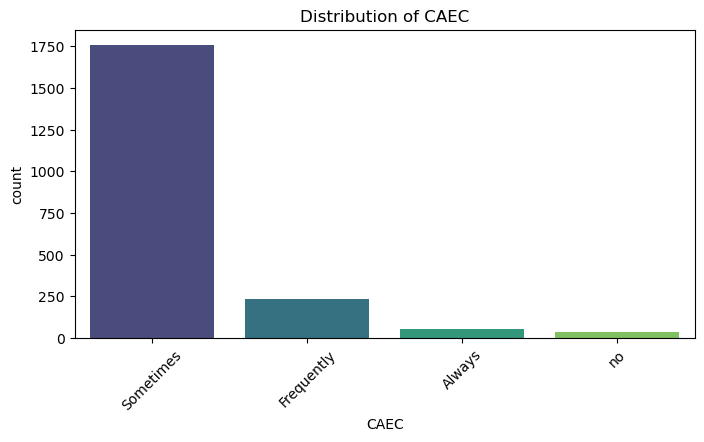

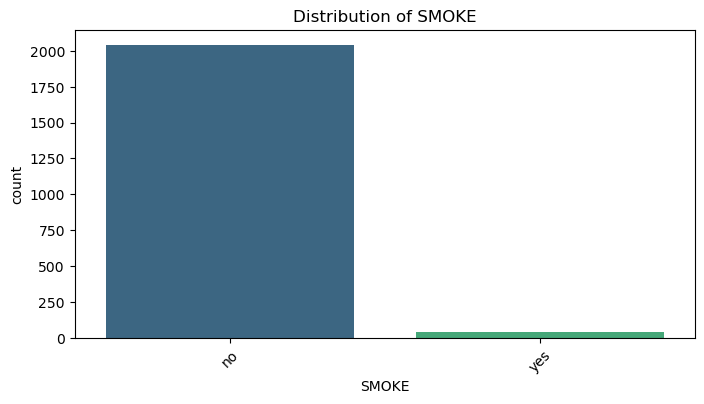

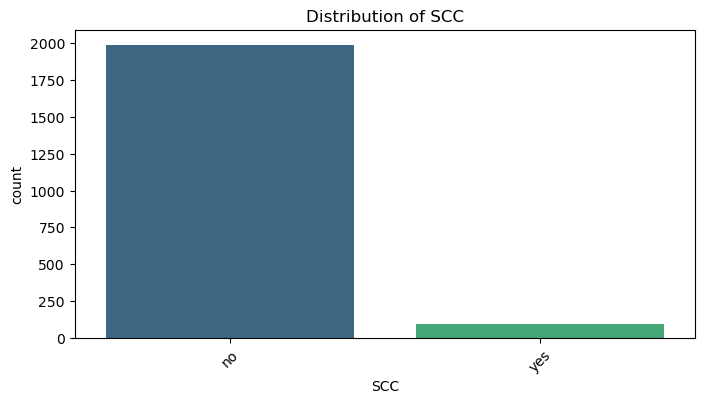

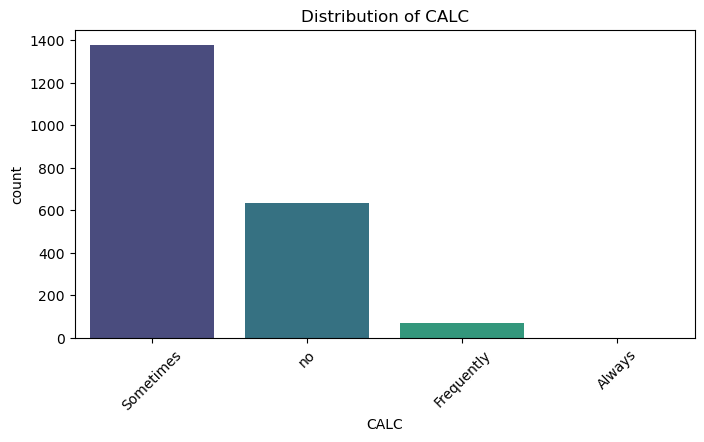

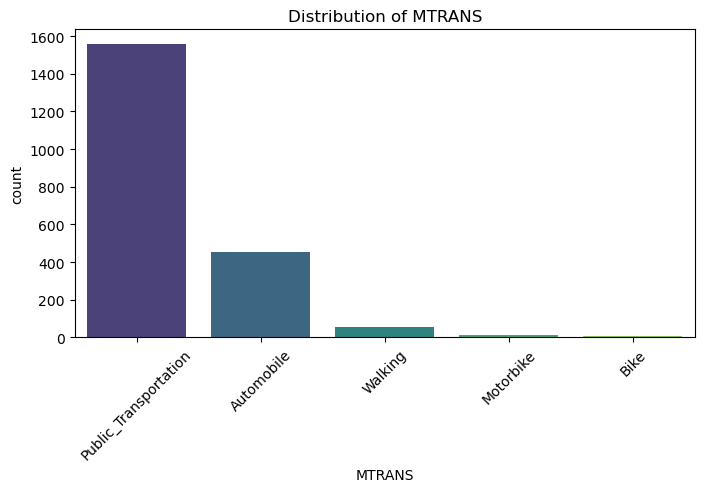

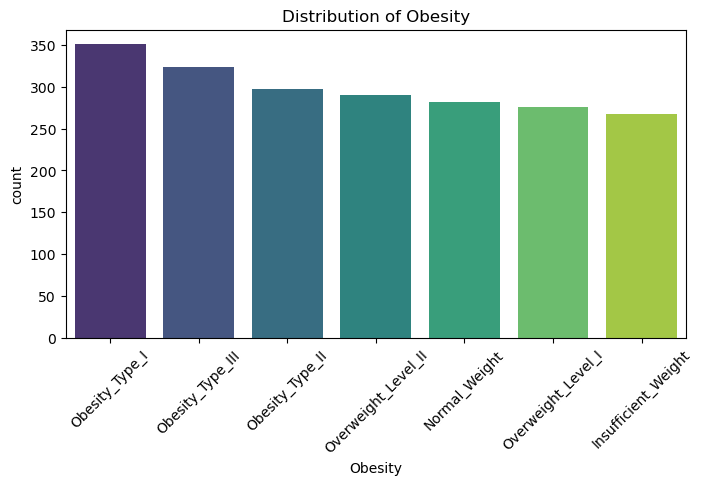

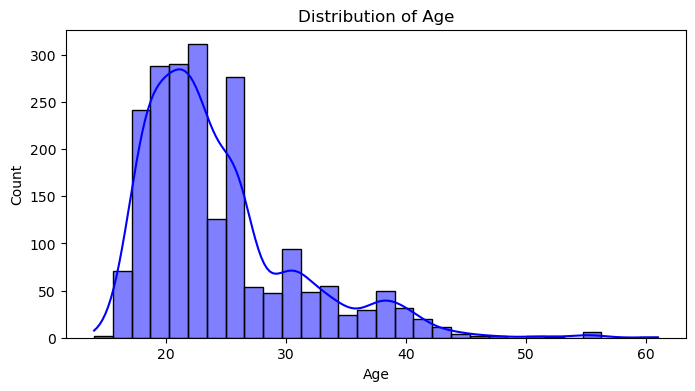

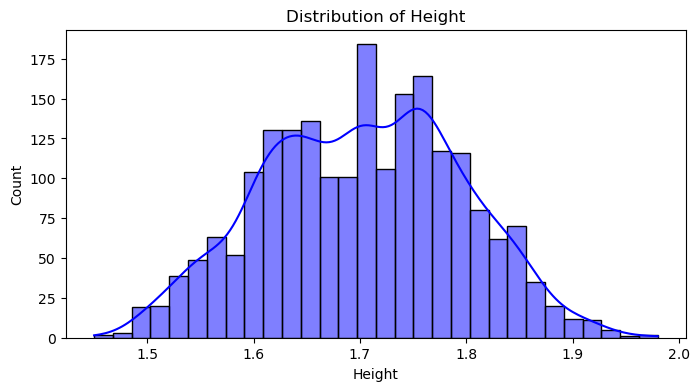

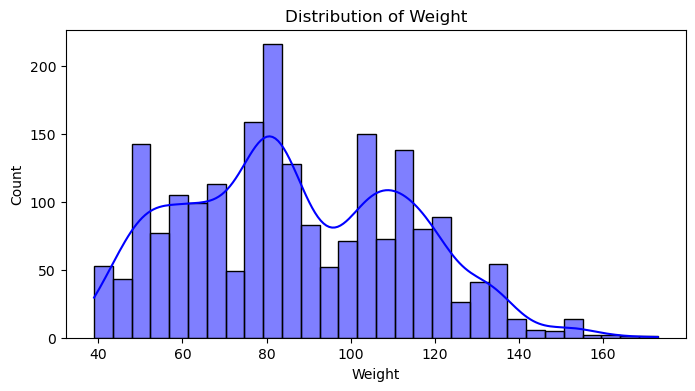

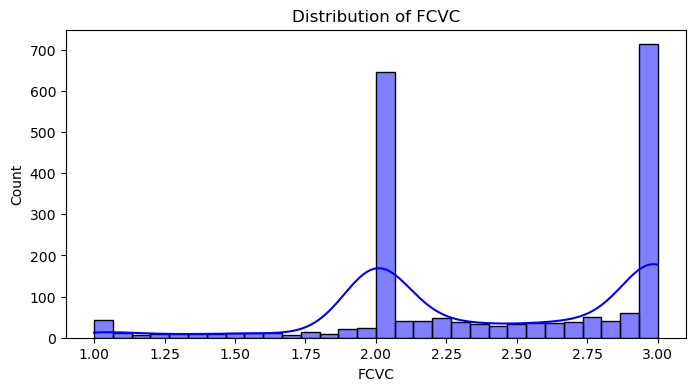

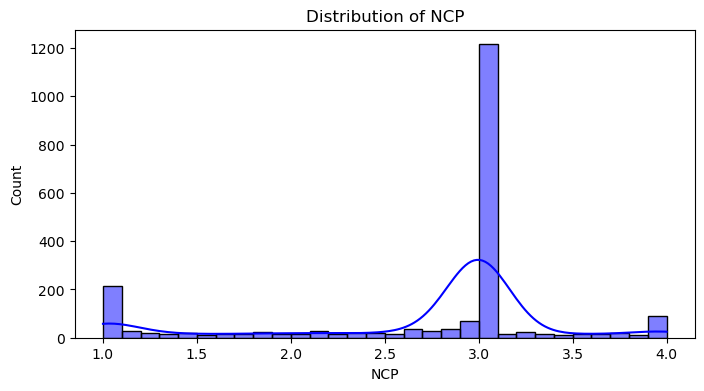

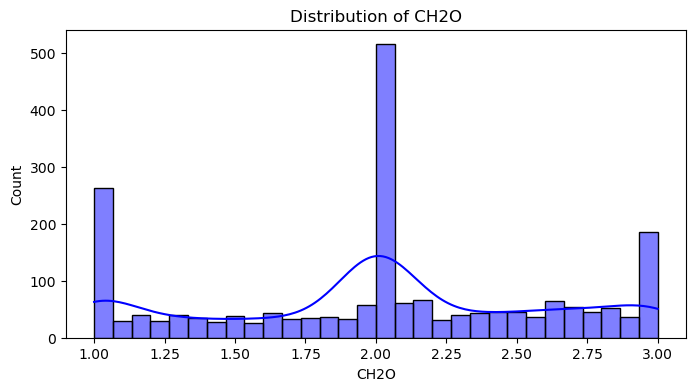

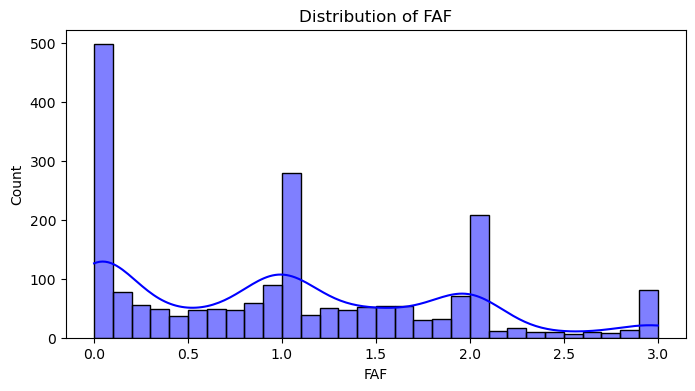

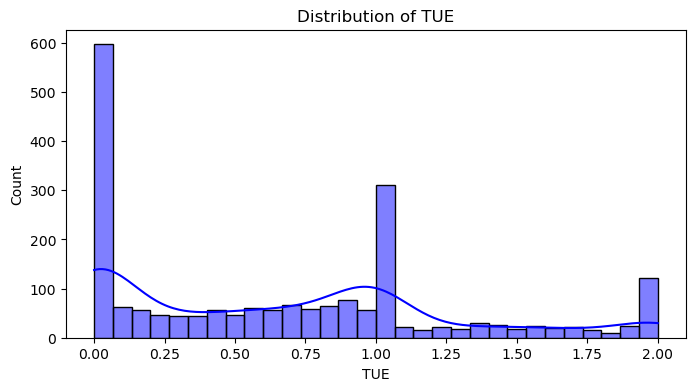

In [26]:
# Separate categorical and numerical features
categorical_features = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Univariate distribution for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate distribution for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()



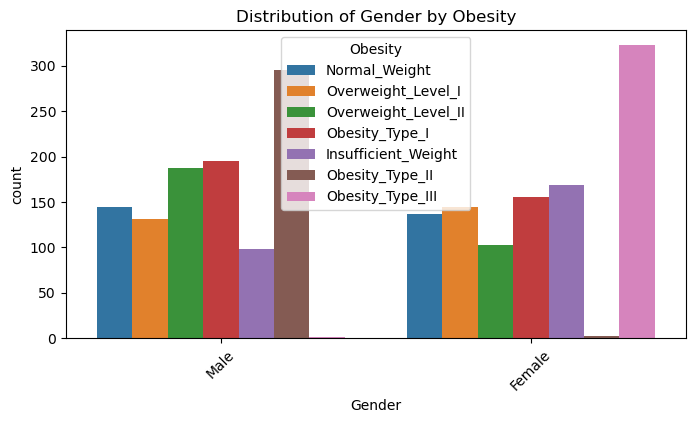

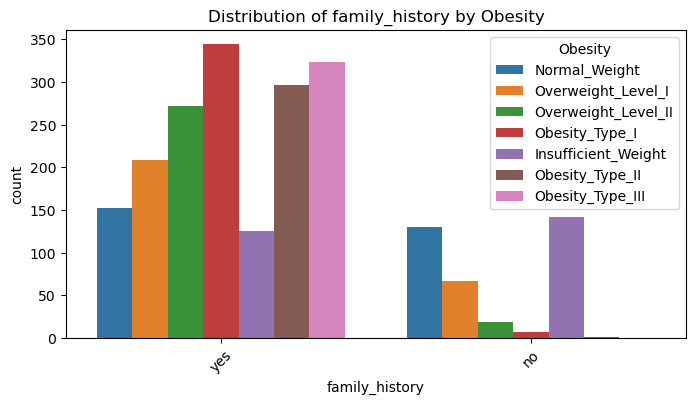

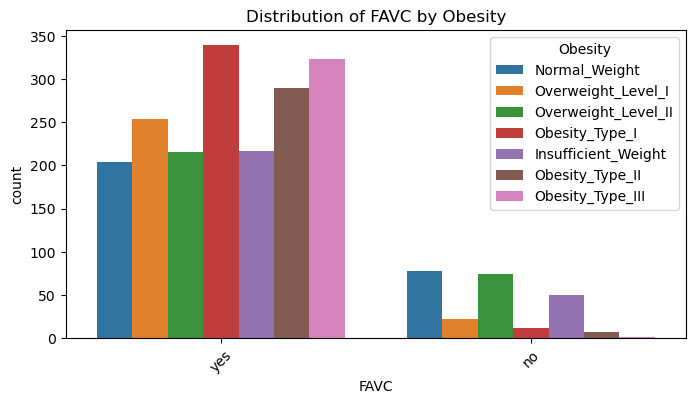

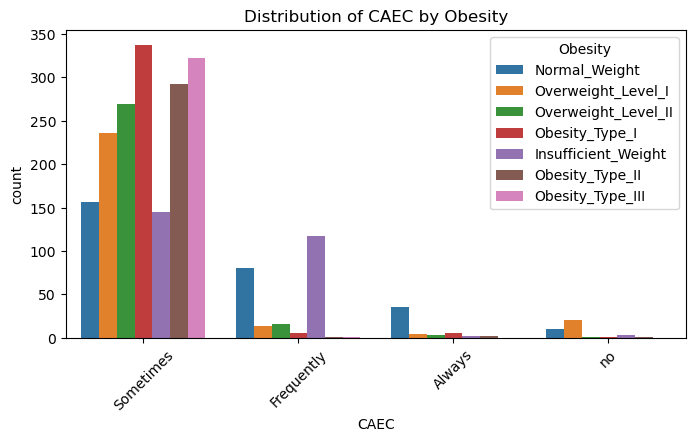

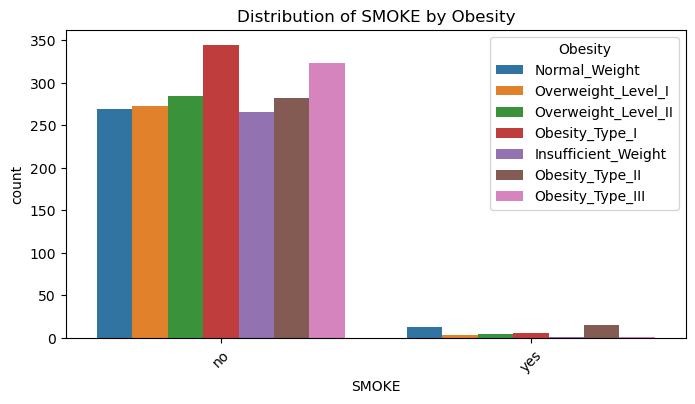

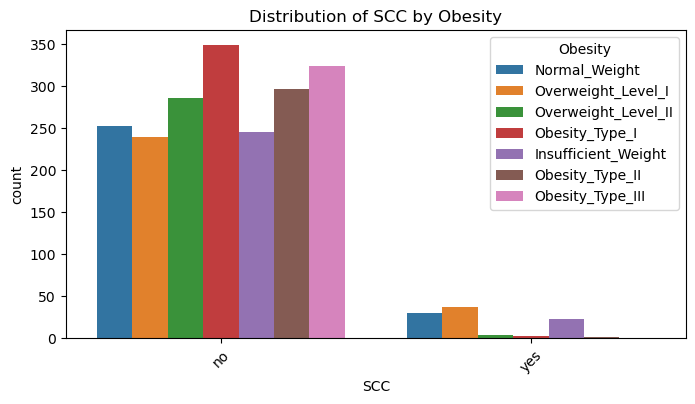

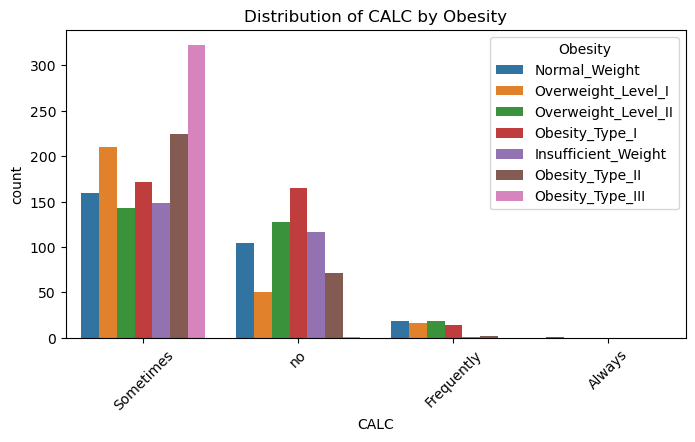

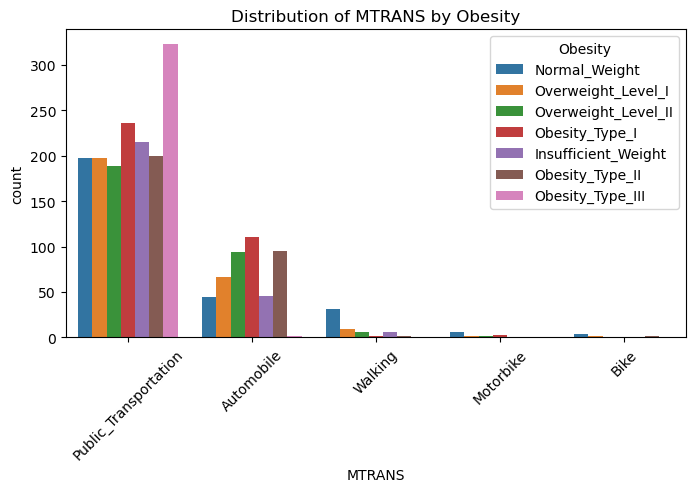

In [27]:
# List of categorical features
categorical_features = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Obesity', order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} by Obesity')
    plt.xticks(rotation=45)
    plt.show()


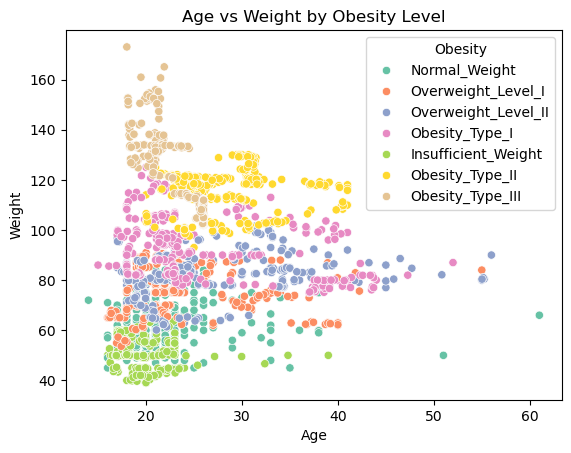

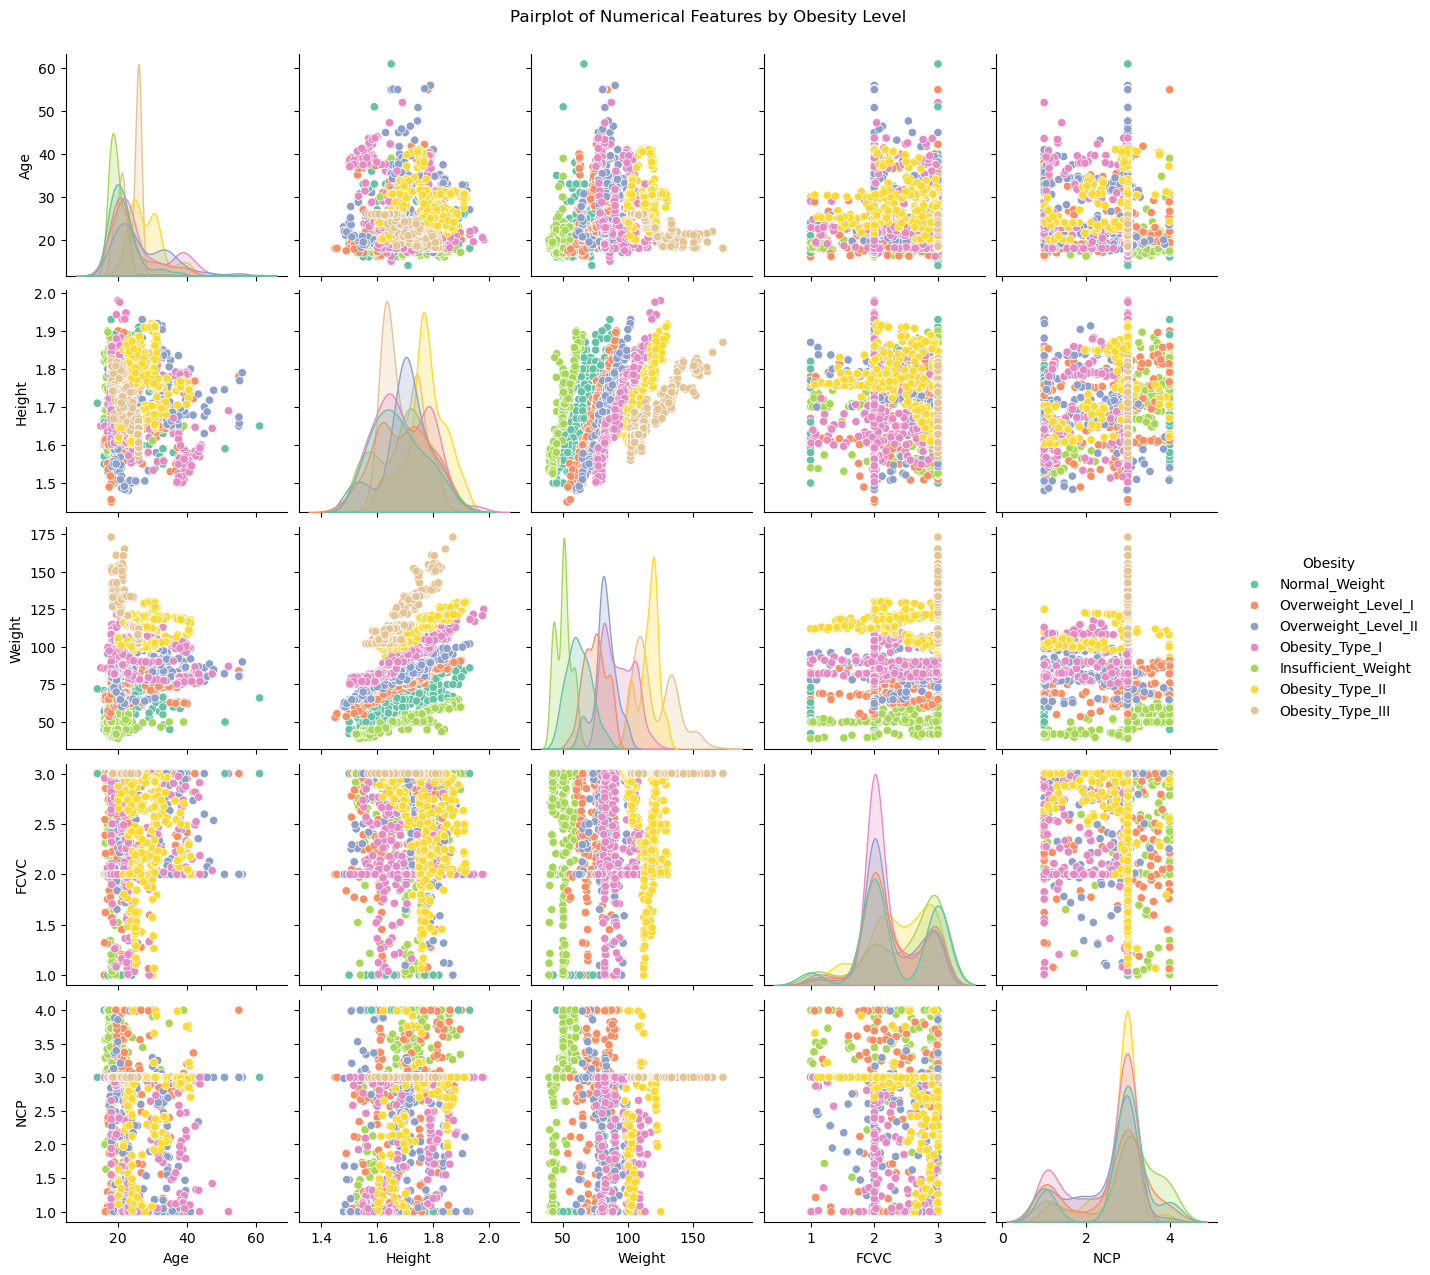

In [28]:
# Numerical vs. Numerical
sns.scatterplot(x='Age', y='Weight', hue='Obesity', data=df, palette='Set2')
plt.title('Age vs Weight by Obesity Level')
plt.show()

# Pairplot (multiple numerical features)
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP']
sns.pairplot(df, vars=numerical_features, hue='Obesity', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Obesity Level', y=1.02)
plt.show()


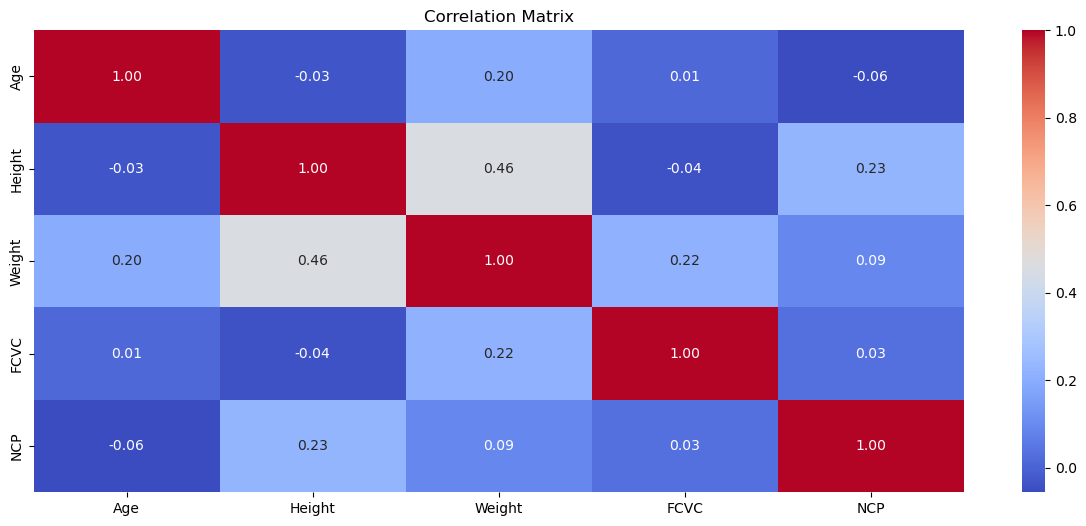

In [29]:
# Compute the correlation matrix for the numerical features in the DataFrame
corr_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

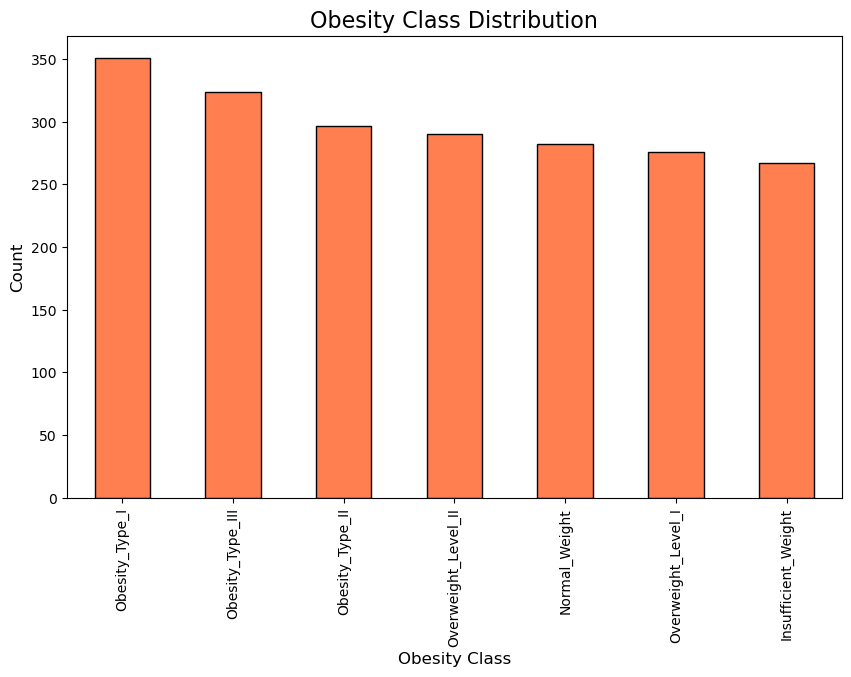

In [30]:
# Bar plot for obesity class distribution
plt.figure(figsize=(10, 6))
df['Obesity'].value_counts().plot(kind='bar', color='coral', edgecolor='black')

# Add labels and title
plt.title("Obesity Class Distribution", fontsize=16)
plt.xlabel("Obesity Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

##### Feature Engineering

In [31]:
# find the BMI since the height and weight is provided
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [32]:
BMI = pd.DataFrame(df.groupby('Age')['Height'].value_counts().reset_index())
BMI

,Age,Height,count
0,14.000000,1.710000,1
1,15.000000,1.650000,1
2,16.000000,1.840000,1
3,16.000000,1.820000,1
4,16.000000,1.670000,1
...,...,...,...
1876,55.022494,1.673394,1
1877,55.137881,1.657221,1
1878,55.246250,1.769269,1
1879,56.000000,1.790000,1


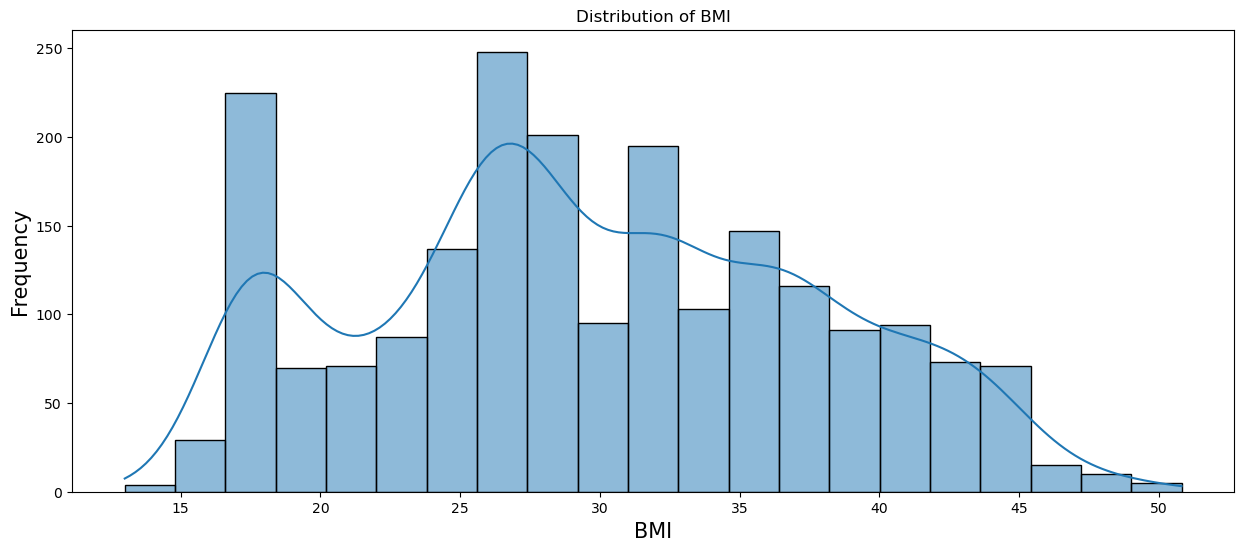

In [33]:
#BMI distribution
plt.figure(figsize=(15, 6))
sns.histplot(df, x='BMI', kde=True)
plt.title(f"Distribution of BMI")
plt.xlabel("BMI", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

#### Transform Categorical columns using one hot encoding

In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[categorical_features] = oe.fit_transform(df[categorical_features])
df.head()




,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,Normal_Weight,24.386526
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,Normal_Weight,24.238227
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,Normal_Weight,23.765432
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,Overweight_Level_I,26.851852
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,Overweight_Level_II,28.342381


In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])

# Display the first few rows to verify
df


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1,24.386526
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1,24.238227
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1,23.765432
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,5,26.851852
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,6,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,4,44.901475
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,4,43.741923
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,4,43.543817
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,4,44.071535


In [36]:
X = df.drop(['Obesity'], axis = 1)
y = df['Obesity']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")


Accuracy: 0.8971291866028708


In [39]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# Print the results
print(f"Random Forest Accuracy: {accuracy_rf}")



Random Forest Accuracy: 0.992822966507177


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)


# Print the results
print(f"Gradient Boosting Accuracy: {accuracy_gb}")



Gradient Boosting Accuracy: 0.9760765550239234


In [41]:
# Evaluation for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)


# Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# Evaluation for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)


# Print the evaluation results
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr}")


print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_rf}")


print("\nGradient Boosting Evaluation:")
print(f"Accuracy: {accuracy_gb}")


Logistic Regression Evaluation:
Accuracy: 0.8971291866028708

Random Forest Evaluation:
Accuracy: 0.992822966507177

Gradient Boosting Evaluation:
Accuracy: 0.9760765550239234


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
}

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Score for Random Forest: {grid_search_rf.best_score_}")

# Evaluate the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)


print(f"Optimized Random Forest Accuracy: {accuracy_rf_best}")



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.9898077718437002
Optimized Random Forest Accuracy: 0.9880382775119617


In [43]:
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting
}

# Initialize GridSearchCV with cross-validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_gb.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Score for Gradient Boosting: {grid_search_gb.best_score_}")

# Evaluate the best model
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb_best = best_gb_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)


print(f"Optimized Gradient Boosting Accuracy: {accuracy_gb_best}")



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Best Score for Gradient Boosting: 0.9790257323191455
Optimized Gradient Boosting Accuracy: 0.9760765550239234


In [44]:
from joblib import dump

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)  # Train the model
dump(clf, 'model.joblib')  # Now this should work



['model.joblib']

In [45]:
pip install fastapi uvicorn

   ---------------------------------------- 0.0/94.9 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/94.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 94.9/94.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ---------------------------------------- 62.3/62.3 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
   ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/431.7 kB ? eta -:--:--
   ---------- ----------------------------- 112.6/431.7 kB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 297.0/431.7 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  430.1/431.7 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 431.7/431.7 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----

In [47]:
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()

# Load the trained model
model = joblib.load("model.joblib")

@app.get("/")
def home():
    return {"message": "Obesity Prediction API is running!"}

@app.post("/predict/")
def predict(features: dict):
    # Convert input data to DataFrame
    df = pd.DataFrame([features])
    prediction = model.predict(df)
    return {"obesity_level": prediction[0]}
